**Performance comparison of different regression models**

This notebook deals with comparison of models like Elastic Net, Linear Regression, LinearSVR, MLPRegressor, RandomForestRegressor using Mean Squared Error and R2 Score metrics.

**Importing the data**


In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import ElasticNet, LinearRegression, Lasso, Ridge
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
%matplotlib inline

import os

**Reading the data**

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [4]:
train_df.isnull().sum()

id                   0
url_legal         2004
license           2004
excerpt              0
target               0
standard_error       0
dtype: int64

**Getting the features**

In [5]:
new_train_df = train_df[['excerpt','target','standard_error']]

**Split the training and testing data**

In [6]:
X = new_train_df['excerpt']
y = new_train_df['target']

In [7]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Stating the regression models**

In [8]:
models = {'Elastic Net': ElasticNet(),
          'Lasso': Lasso(),
          'LinearRegression': LinearRegression(),
          'MLPRegressor': MLPRegressor(),
          'Ridge': Ridge(),
          'LinearSVR': LinearSVR(),
          'RandomForest': RandomForestRegressor(),
          'XGBoost': XGBRegressor(n_estimators=1000,eta=0.1, tree_method='hist'), 
          'SVR': SVR(kernel = 'rbf')}

**MSE AND R2_square error**

In [9]:
mean_squared_errors = []
r2_scores = []
for m in models.values():
    pipeline = Pipeline([('tfidf',TfidfVectorizer()),('rgr',m)])
    pipeline.fit(X_train,y_train)
    preds = pipeline.predict(X_test)
    mean_squared_errors.append(mean_squared_error(y_test,preds))
    r2_scores.append(r2_score(y_test,preds))

**Visualizing the Errors**

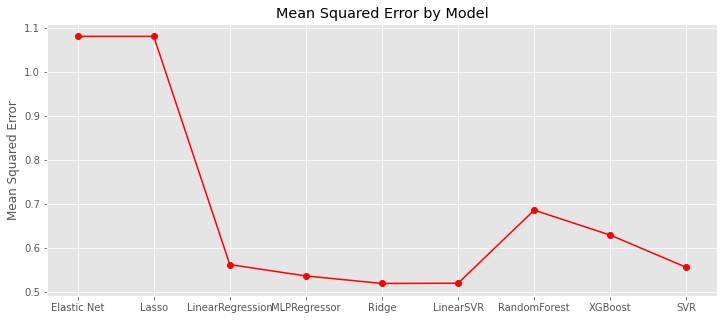

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(12,5))
plt.plot(models.keys(),mean_squared_errors,color='r',marker='o')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error by Model')
plt.show()

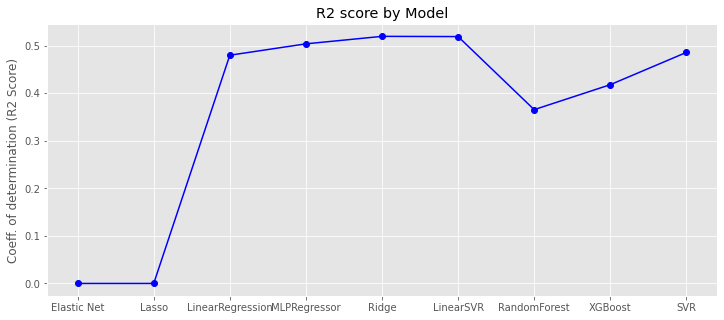

In [11]:
plt.figure(figsize=(12,5))
plt.plot(models.keys(),r2_scores,color='b',marker='o')
plt.ylabel('Coeff. of determination (R2 Score)')
plt.title('R2 score by Model')
plt.show()